# Hidden Markov Model (HMM) for sequence prediction with an application to the flowshop problem F2||SumCj


# Goals : 
1. A presentation of HMM
2. An application to the flowshop problem

# Author: Romain Raveaux (romain.raveaux@univ-tours.fr)

# The lecture
The content of the is notebook is based on the following lectures : 
Supervised Machine Learning for structured input/output: 

*   1\. Introduction to supervised Machine Learning: A probabilistic introduction [PDF](http://romain.raveaux.free.fr/document/courssupervisedmachinelearningRaveaux.pdf)

*   2\. **Connecting local models : The case of chains** [PDF slides](http://romain.raveaux.free.fr/document/Connecting%20local%20models%20the%20case%20of%20chains%20.pdf)

*   3\. Connecting local models : Beyond chains and trees.[PDF slides](http://romain.raveaux.free.fr/document/Structured%20Output%20Learning.pdf)

*   4\. Machine Learning and Graphs : Introduction and problems [PDF slides](http://romain.raveaux.free.fr/document/cours%20IA%20DI5%20graphs%20introV2.pdf)

*   5\. Graph Neural Networks. [PDF slides](http://romain.raveaux.free.fr/document/graph%20neural%20networks%20romain%20raveaux.pdf)

*   6\. Graph Kernels. [PDF slides](http://romain.raveaux.free.fr/document/graph%20kernel%20romain%20raveaux.pdf)


# Problem definition : 
$\mathcal{D}= \{x_i,y_i\}_{i=1}^N$ with $N$ the number of pair samples.

$x_i \in \mathbb{R}^{M \times 4}$ is a sequence of $M$ jobs. A job is defined by four values : processing times on machine 1 and 2 and completion times on machine 1 and 2.

$y_i \in \{0,1\}^{M \times 1}$ is a sequence representing a window (values equals to 1) where the sequence $x_i$ is to be re-optimized to get a better scheduling.

We want to find a function $f: \mathbb{R}^{M \times 4} \to \{0,1\}^{M \times 1}$.

We want to predict where the sequence $x_i$ should be reoptimized to get a better scheduling.

# A sequence model : HMM
Let us try to model our sequence thanks to a HMM model. 
![Graph Convolution](http://romain.raveaux.free.fr/document/hmmmodel.PNG)

# Inference with HMM : Maximum a posteriori
We take a new set of measurements ($x^{new}$) and use the model to tell us about the world state ($y$).
The HMM is generative model because it models $Pr(x_i|y_i)$ where we want $Pr(y_i|x_i)$.
Inference with a generative model can be achieved by the baye’s rule. We obtain the so called posterior distribution. 
![Graph Convolution](http://romain.raveaux.free.fr/document/MAPHMM.PNG)
Finding the maximum of the posterior distribution is known as Maximum a posteriori (**MAP**).

# Inference with HMM : the optimization problem
Let us define the optimization problem to find the MAP.
$$Pr(y_1,\cdots,y_M|x^{new}_1,\cdots,x^{new}_M)=\frac{Pr(x_1^{new},\cdots,x_M^{new}|y_1,\cdots,y_M).Pr(y_1,\cdots,y_M)}{Pr(x_1^{new},\cdots,x_M^{new})}$$
$$\hat{y_1},\cdots,\hat{y_M}=arg \max_{y_1,\cdots,y_M} \bigg[Pr(y_1,\cdots,y_M|x^{new}_1,\cdots,x^{new}_M) \bigg]$$
$$\hat{y_1},\cdots,\hat{y_M}=arg \max_{y_1,\cdots,y_M} \bigg[ Pr(x_1^{new},\cdots,x_M^{new}|y_1,\cdots,y_M).Pr(y_1,\cdots,y_M) \bigg]$$

$$\hat{y_1},\cdots,\hat{y_M}=arg \max_{y_1,\cdots,y_M} \bigg[ \prod_{i=1}^M Pr(x_i^{new}|y_i) .Pr(y_1)\prod_{i=2}^M Pr(y_i|y_{i-1}) \bigg]$$

$$\hat{y_1},\cdots,\hat{y_M}=arg \min_{y_1,\cdots,y_M} - \log \bigg[ Pr(x_1^{new},\cdots,x_M^{new}|y_1,\cdots,y_M).Pr(y_1,\cdots,y_M) \bigg]$$

$$\hat{y_1},\cdots,\hat{y_M}=arg \min_{y_1,\cdots,y_M} \bigg[ -\sum_{i=1}^M Pr(x_i^{new}|y_i) - Pr(y_1) - \sum_{i=2}^M Pr(y_i|y_{i-1}) \bigg]$$
$$\hat{y_1},\cdots,\hat{y_M}=arg \min_{y_1,\cdots,y_M} \bigg[  \sum_{i=1}^M U_i(y_i) + \sum_{i=2}^M P_i(y_i,y_{i-1}) \bigg]$$
$$U_i(y_i) =-\log [ Pr(x_i^{new}|y_i) ]$$
$$P_i(y_i,y_{i-1}) =-\log [ Pr(y_i|y_{i-1}) ]$$

# Solving the optimization problem
The MAP problem can be solved thanks to the Viterbi Algorithm which complexity is $O(MK^2)$ where K is the number of states for $y_{i,j}$ variables. K is equal to 2 here in our case.

# Learning with HMM
So far there is no learning.
1. We just give a sequence (x) and output the labeled sequence (y)
2. Where learning can be introduced ?
3. Where are the parameters ?

Supervised learning
1. Relatively simple. We first isolate the part of the model that we want to learn : $Pr(x_i|y_i;W_1)$ and $Pr(y_i|y_{i-1};W_2)$. For example, we might learn the parameters $W_1$, $W_2$ from paired examples of $x_i$ and $y_i$. 

2. We model $Pr(x_i|y_i)$ as being categorically distributed, where the parameters depend $y_i$, so that $Pr(x_i|y_i)=Cat_{x_i}[\lambda]$. So $W_1= \lambda$. Another model could be used, if we assume that our data are normally distributed : $Pr(x_i|y_i)=Norm_{x_i}[\mu,\sigma]$. So $W_1= [\mu,\sigma]$.

3. We model $Pr(y_i|y_{i-1})$ as a being categorically distributed, where the parameters depend on the previous sign $y_{i-1}$
so that $Pr(y_i|y_{i-1}=0)=Cat_{y_i}[\gamma]$. So $W_2= \gamma$. In our case, $W_2 \in \mathbb{R}^2$.

# Modeling $Pr(x_i|y_i)$  : the important part
There is a doubt about what type of distributions could model correctly $Pr(x_i|y_i)$.
## A non-positional model
First, we model $Pr(x_i|y_i)$ as we would do it in Natural Language Processing or Computer Vision fields. It means that we are thinking in terms of a time invariant model. $Pr(x_i|y_i)$ does not depends on the time step.
### A normal distribution (multivariate)
$Pr(x_i|y_i)=Norm_{x_i}[\mu,\sigma]$. So $W_1= [\mu,\sigma]$. $\mu \in \mathbb{R}^{2 \times 4}$. $\sigma \in \mathbb{R}^{2 \times 4 \times 4}$. 
### A categorical distribution
Or,  $Pr(x_i|y_i)=Cat_{x_i}[\lambda]$. $\lambda \in \mathbb{R}^{2 \times 4 \times \#bins}$. Where $\#bins$ is the number of unique values for all $p1$, $p2$, $c1$, $c2$. $p1$ is a processing time on machine one. $p2$ is a processing time on machine two. $c1$ is a completion time on machine one. $c2$ is a completion time on machine two. 
### A naïve categorical distribution
Modeling these four features (p1,p2, c1, c2) independently, the distribution becomes
$$Pr(x_i|y_i)=Cat_{x_i^{p1}}[\lambda^{p1}].Cat_{x_i^{p2}}[\lambda^{p2}].Cat_{x_i^{c1}}[\lambda^{c1}].Cat_{x_i^{c2}}[\lambda^{c2}]$$
We refer to the assumption that the elements of the data vector are independent as naïve distribution. Of course, it is not necessarily valid in the real world. To model the joint distribution of the p1,p2,c1,c2 components, we might combine them
to form one variable with $\#bins^4$ entries and model this with a single categorical distribution. Unfortunately, this means we must learn  $\#bins^4$ parameters for each categorical distribution, and so it is not practical. 
### A quantized categorical distribution
A possibility would be to quantize each component to fewer levels (say 8) before combining them together.

### Discussion 
I feel that the normal distribution would not fit our data (at least p1, p2) that are drawn from a uniform distribution. Categorical distribution will better fit our data distribution. However, I think that a uniform distribution is not very informative. It is not a good idea to model the distribution of p1 and p2 regardless the time index.

**To sum up : **
1. A non-positional modeling could be interesting but only for c1, and c2 features. 
2. A naîve categorical distribution seems to me a better choice than a quantized categorical distribution.
3. Note : I dit not speak about modeling $Pr(x_i|y_i)$ by a mixture of distributions (Gaussian or Bernoulli) thanks the Expectation Maximization (EM) framework. I think it could be interesting but it will require CPU time and data. See the link for more details... http://romain.raveaux.free.fr/document/GaussianMixtureandExpectationMaximization.html

## Positional modeling or a time-indexed model
In this section, we present a model where the position is important. For instance, in Natural Language Processing a word ($x_i$) can appear anywhere in a sentence. Consequently, the position (on its own) of the word should be not impact the chance of generating a given $x_i$. The chance of generating a given $x_i$ should depend only on the state of $y_i$ ($Pr(x_i|y_i)$) and the former state $y_{i-1}$ ($Pr(y_i|y_{i-1})$).
Here in the flowshop problem, it is different. The position is an important feature. So the distribution $x_i$ should depend on the position $i$ as follows : $Pr(x_i|y_i,i)$. $Pr(x_i|y_i,i)$ can be modeled by multivariate Gaussian or categorical distributions.
$Pr(x_i|y_i,i)=Norm_{x_i}[\mu,\sigma]$. So $W_1= [\mu,\sigma]$. $\mu \in \mathbb{R}^{M \times 2 \times 4}$. $\sigma \in \mathbb{R}^{M \times 2 \times 4 \times 4}$. And $M$ is the number of jobs ($\#jobs$).


### Discussion 
This time-indexed model for $Pr(x_i|y_i,i)$ will increase the number of paramaters by a factor that is related to the number of jobs (300 jobs for instance). However, I think that the distributions are still computatble on a modern computer. Another issue is that the HMM could only work on a fixed-length sequences (i.e 300 jobs). Distributions learnt for a set of 300-jobs sequences will be very different from distributions learnt on a set of 100-jobs sequences.

# Limitations of the HMM : 
1. Markov Assumption : The future depends only on the present. Also known as firs order Markov chain
2. It is a generative model. We want to predict $y_i$ and instead we generate $x_i$
3. $Pr(x_i|y_i)$ and $Pr(y_i|y_{i-1})$ holds parameters that are shared through time. All time steps have the same parameters. Corresponding to the assumption of a stationary time series.


# Let us get in touch with the data

# The imports

In [1]:
import csv
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt


# The parsing functions : They are taken from the Alafate Abulimiti project (https://github.com/AlafateABULIMITI/PRD) . We can skip this part.... We assume they are ok.

In [2]:

def saveLinewithC(line):
        """
        Supplement function for bulid the diffrent sets of the seq2seq model.

        :param line: one line of the csv file
        :return: ptimes_list, solved_list.

        ptimes_list: the sequence with processing time and completion time.
        solved_list: the binary sequence that can indicate the window.
        """
        #print(line)
        ptimes = line[0].split(' ')
        ptimes_list = []
        # print(ptimes)
        for k in range(1, len(ptimes), 4):
            ptimes_list.append(
                [int(float(ptimes[k])), int(float(ptimes[k + 1])), int(float(ptimes[k + 2])),
                 int(float(ptimes[k + 3]))])
        solved_list = list(map(int, line[1]))

        return ptimes_list, solved_list


In [3]:

def divideDatawithC(size, num_instance):
        """
        Function can divide the data into 3 part: Training set, Test set and Validation set.

        :param txtfile: the path of the database txt file.
        :param size: size of the sequence
        :return: X_train, y_train, X_test, y_test, X_validation, y_validation
        X_train: Training set which have the initial sequence with processing time and completion time.
        y_train: Training set which have the binary sequnece that can indicate the window.
        X_test: Test set which have the initial sequence with processing time and completion time.
        y_test: Test set which have the binary sequnece that can indicate the window.
        X_validation: Validation set which have the initial sequence with processing time and completion time.
        y_validation: Validation set which have the binary sequnece that can indicate the window.

        """

        print("num_instance: " + str(num_instance))
        num_ins_test = int(num_instance * 0.2)
        num_ins_validation = num_ins_test
        num_ins_train = num_instance - num_ins_test * 2
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        X_validation = []
        y_validation = []
        with open('databaseC.csv') as data:
            reader = csv.reader(data)
            dataSet = list(reader)
            length = len(dataSet)
            count = 0
            for line in dataSet:
                if len(line) == 1:
                    count = count + 1
                    continue
                if count <= num_ins_train:
                    ptimes_list, solved_list = saveLinewithC(line)
                    X_train.append(ptimes_list)
                    y_train.append(solved_list)
                if num_ins_train < count <= num_ins_train + num_ins_test:
                    ptimes_list, solved_list = saveLinewithC(line)
                    X_test.append(ptimes_list)
                    y_test.append(solved_list)
                if num_ins_train + num_ins_test < count <= num_instance:
                    ptimes_list, solved_list = saveLinewithC(line)
                    X_validation.append(ptimes_list)
                    y_validation.append(solved_list)
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train)
        y_train = np.reshape(y_train, (len(y_train), size, 1))
        X_test = np.asarray(X_test)
        y_test = np.asarray(y_test)
        y_test = np.reshape(y_test, (len(y_test), size, 1))
        X_validation = np.asarray(X_validation)
        y_validation = np.asarray(y_validation)
        y_validation = np.reshape(y_validation, (len(y_validation), size, 1))
        return X_train, y_train, X_test, y_test, X_validation, y_validation



# Let us read the data

In [4]:
num_instance = 4448 # num of instances, maximum 4448 by default
jobs_size = 100 # size of jobs = size of input 

X_train, Y_train, X_test, Y_test, X_validation,Y_validation=divideDatawithC(jobs_size,num_instance)
print("X_train=", X_train.shape)
print("Y_train=",Y_train.shape)


num_instance: 4448
X_train= (15987, 100, 4)
Y_train= (15987, 100, 1)


# Let's select the data where $y_i=0$

In [5]:
zeroindices=np.where(Y_train==0)
selectedX= X_train[zeroindices[0],zeroindices[1],:]
print(selectedX.shape)

(1376764, 4)


# Distribution of processing times on machine 1 given $y_i=0$

1
50.285656074679466
836.4064341407054
100


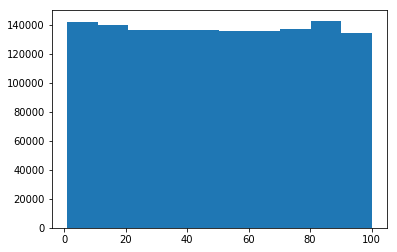

In [6]:
print(selectedX[:,0].min())
print(selectedX[:,0].mean())
print(selectedX[:,0].var())
print(selectedX[:,0].max())
plt.figure(1)
plt.hist(selectedX[:,0])
plt.show()

# Distribution of processing times on machine 2 given $y_i=0$

1
50.24570078822514
828.7543037898769
100


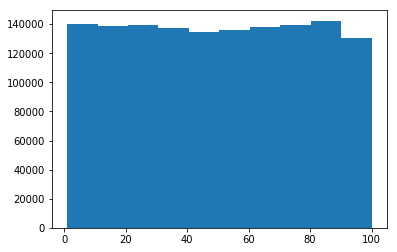

In [7]:
print(selectedX[:,1].min())
print(selectedX[:,1].mean())
print(selectedX[:,1].var())
print(selectedX[:,1].max())
plt.figure(1)
plt.hist(selectedX[:,1])
plt.show()

# Distribution of completion times on machine 1 given $y_i=0$

1
1989.9446869615997
2368848.9523990657
6028


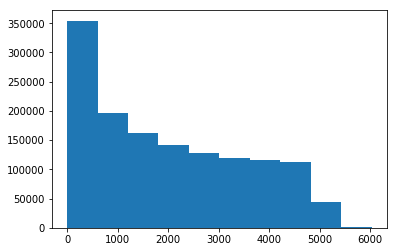

In [8]:
print(selectedX[:,2].min())
print(selectedX[:,2].mean())
print(selectedX[:,2].var())
print(selectedX[:,2].max())
plt.figure(1)
plt.hist(selectedX[:,2])
plt.show()

# Distribution of completion times on machine 2 given $y_i=0$

2
2057.7717626259837
2464201.7551244795
6040
(5729,)


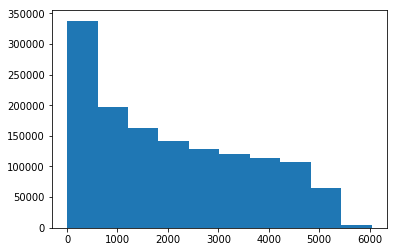

In [9]:
print(selectedX[:,3].min())
print(selectedX[:,3].mean())
print(selectedX[:,3].var())
print(selectedX[:,3].max())
print(np.unique(selectedX[:,3]).shape)
plt.figure(1)
plt.hist(selectedX[:,3])
plt.show()

Let us try to model the distribution $Pr(x_i|y_i=0)$
$$Pr(x_i|y_i=0)=Norm_{X_i}[\mu_0,\sigma_0]$$
In our case, the shape of the variables will be :
$$\mu_0=[4,1]$$
$$\sigma_0=[4,4]$$



In [10]:
def ComputeMu0(X_train, Y_train):
    zeroindices=np.where(Y_train==0)
    res= X_train[zeroindices[0],zeroindices[1],:].mean(axis=0)
    return res

mu0=ComputeMu0(X_train, Y_train)
print(mu0)

[  50.28565607   50.24570079 1989.94468696 2057.77176263]


In [11]:
def CoVar0(X_train, Y_train):
    zeroindices=np.where(Y_train==0)
    selectedX= X_train[zeroindices[0],zeroindices[1],:]
    res= np.cov(selectedX.T)
    return res
sigma0=CoVar0(X_train, Y_train)
print(sigma0)

[[8.36407042e+02 3.57833582e+01 3.16411143e+04 3.16646920e+04]
 [3.57833582e+01 8.28754906e+02 2.77384079e+04 2.88956457e+04]
 [3.16411143e+04 2.77384079e+04 2.36885067e+06 2.41434396e+06]
 [3.16646920e+04 2.88956457e+04 2.41434396e+06 2.46420354e+06]]


In [12]:
def gaussian(x, mean, var):
    num = -np.power(x - mean, 2.)
    denum = 2 * var
    factor = (np.sqrt(2*var*np.pi))
    res=np.exp(num/denum)
    res = res /factor
    return res

# Gaussian distribution of processing times on machine 1 given $y_i=0$

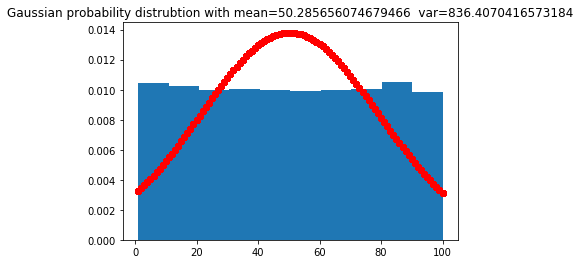

In [13]:
plt.figure(1)    
plt.title("Gaussian probability distrubtion with mean="+str(mu0[0])+"  var="+str(sigma0[0,0]))
plt.hist(selectedX[:,0],density =True)

plt.plot(selectedX[:,0],gaussian(np.array(selectedX[:,0]), mu0[0], sigma0[0,0]),'ro')
plt.show()

# The gaussian distribution does not fit well the data (processing times on machine 1). This is not surprising because processing times are drawn from a uniform distribution.

# Let us try another model to model the distribution $Pr(x_i|y_i=0)$
We model $Pr(x_i|y_i=0)$ as a being categorically distributed, where the parameters depend $y_i=0$, so that
$$Pr(x_i|y_i=0)=Cat_{x_i}[\lambda_0]$$
In our case, the shape of the variables will be :
$$\lambda_0=[4,\text{nb_bins}]$$
# Let us preprocess the data to make them start from 0 (We withdraw the min of each feature)
# We consider the case when $y_i=0$

In [14]:
zeroindices=np.where(Y_train==0)
selectedX= X_train[zeroindices[0],zeroindices[1],:]
print(selectedX.shape)
minvalues=selectedX.min(axis=0)
print(minvalues)
preprocessedX=selectedX-minvalues
print(preprocessedX.shape)

(1376764, 4)
[1 1 1 2]
(1376764, 4)


# We display the the distribution of p1

(100,)
0
99
(100, 1)
0.9999999999999999


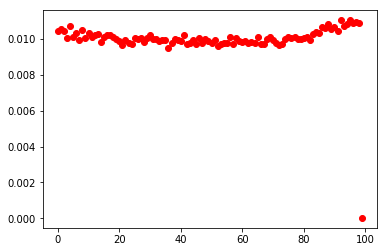

In [15]:
uniquevalues0, counts0=np.unique(preprocessedX[:,0], return_counts=True)
print(uniquevalues0.shape)
print(uniquevalues0.min())
print(uniquevalues0.max())
#dict(zip(uniquevalues0, counts0))
lambda00=np.zeros((uniquevalues0.max()+1,1))
print(lambda00.shape)
for i in range(uniquevalues0.shape[0]):
    index=uniquevalues0[i]
    lambda00[index,0]=counts0[i]
lambda00/=counts0.sum()
print(lambda00.sum())
plt.figure(1)
plt.plot(lambda00,'ro')
plt.show()


# We display the the distribution of p2

(100,)
0
99
(100, 1)
1.0000000000000002


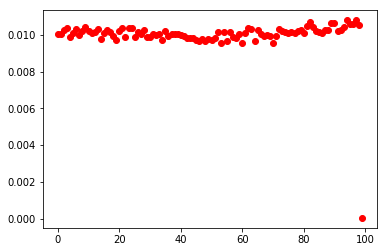

In [16]:
uniquevalues1, counts1=np.unique(preprocessedX[:,1], return_counts=True)
print(uniquevalues1.shape)
print(uniquevalues1.min())
print(uniquevalues1.max())
lambda01=np.zeros((uniquevalues1.max()+1,1))
print(lambda01.shape)
for i in range(uniquevalues1.shape[0]):
    index=uniquevalues1[i]
    lambda01[index,0]=counts1[i]
#print(lambda00)
lambda01/=counts1.sum()
print(lambda01.sum())
plt.figure(1)
plt.plot(lambda01,'ro')
plt.show()


# We display the the distribution of c1

(5619,)
0
6027
(6028, 1)
1.0


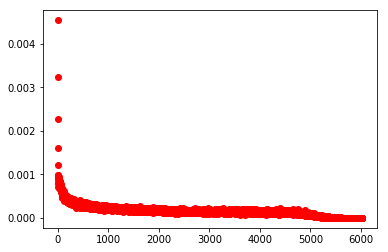

In [17]:
uniquevalues2, counts2=np.unique(preprocessedX[:,2], return_counts=True)
print(uniquevalues2.shape)
print(uniquevalues2.min())
print(uniquevalues2.max())
lambda02=np.zeros((uniquevalues2.max()+1,1))
print(lambda02.shape)
for i in range(uniquevalues2.shape[0]):
    index=uniquevalues2[i]
    lambda02[index,0]=counts2[i]
lambda02/=counts2.sum()
print(lambda02.sum())
plt.figure(1)
plt.plot(lambda02,'ro')
plt.show()


# We display the the distribution of c2

(5729,)
0
6038
(6039, 1)
1.0


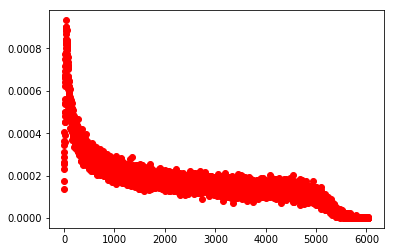

In [18]:
uniquevalues3, counts3=np.unique(preprocessedX[:,3], return_counts=True)
print(uniquevalues3.shape)
print(uniquevalues3.min())
print(uniquevalues3.max())
lambda03=np.zeros((uniquevalues3.max()+1,1))
print(lambda03.shape)
for i in range(uniquevalues3.shape[0]):
    index=uniquevalues3[i]
    lambda03[index,0]=counts3[i]
lambda03/=counts3.sum()
print(lambda03.sum())
plt.figure(1)
plt.plot(lambda03,'ro')
plt.show()

# Let us preprocess the data to make them start from 0 (We withdraw the min of each feature)
# We consider the case when $y_i=1$

In [19]:
zeroindices=np.where(Y_train==1)
selectedX= X_train[zeroindices[0],zeroindices[1],:]
print(selectedX.shape)
minvalues=selectedX.min(axis=0)
print(minvalues)
preprocessedX=selectedX-minvalues
print(preprocessedX.shape)

(221936, 4)
[1 1 1 5]
(221936, 4)


# We display the the distribution of p1

(100,)
0
99
(100, 1)
1.0


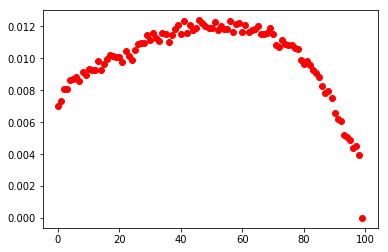

In [20]:
uniquevalues0, counts0=np.unique(preprocessedX[:,0], return_counts=True)
print(uniquevalues0.shape)
print(uniquevalues0.min())
print(uniquevalues0.max())
#dict(zip(uniquevalues0, counts0))
lambda10=np.zeros((uniquevalues0.max()+1,1))
print(lambda10.shape)
for i in range(uniquevalues0.shape[0]):
    index=uniquevalues0[i]
    lambda10[index,0]=counts0[i]
lambda10/=counts0.sum()
print(lambda10.sum())
plt.figure(1)
plt.plot(lambda10,'ro')
plt.show()


# We display the the distribution of p2

(100,)
0
99
(100, 1)
1.0


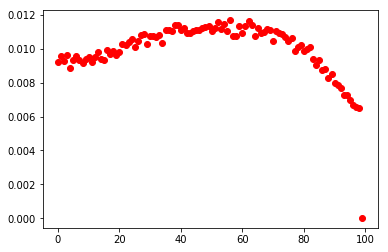

In [21]:
uniquevalues1, counts1=np.unique(preprocessedX[:,1], return_counts=True)
print(uniquevalues1.shape)
print(uniquevalues1.min())
print(uniquevalues1.max())
lambda11=np.zeros((uniquevalues1.max()+1,1))
print(lambda11.shape)
for i in range(uniquevalues1.shape[0]):
    index=uniquevalues1[i]
    lambda11[index,0]=counts1[i]
lambda11/=counts1.sum()
print(lambda11.sum())
plt.figure(1)
plt.plot(lambda11,'ro')
plt.show()


# We display the the distribution of c1

(4918,)
0
5388
(5389, 1)
1.0


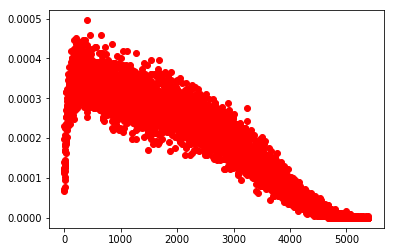

In [22]:
uniquevalues2, counts2=np.unique(preprocessedX[:,2], return_counts=True)
print(uniquevalues2.shape)
print(uniquevalues2.min())
print(uniquevalues2.max())
lambda12=np.zeros((uniquevalues2.max()+1,1))
print(lambda12.shape)
for i in range(uniquevalues2.shape[0]):
    index=uniquevalues2[i]
    lambda12[index,0]=counts2[i]
lambda12/=counts2.sum()
print(lambda12.sum())
plt.figure(1)
plt.plot(lambda12,'ro')
plt.show()


# We display the the distribution of c2

(5006,)
0
5389
(5390, 1)
1.0


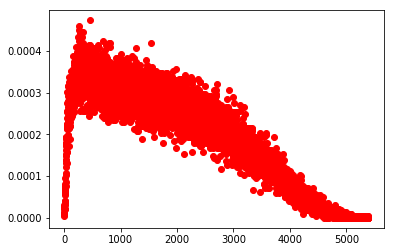

In [23]:
uniquevalues3, counts3=np.unique(preprocessedX[:,3], return_counts=True)
print(uniquevalues3.shape)
print(uniquevalues3.min())
print(uniquevalues3.max())
lambda13=np.zeros((uniquevalues3.max()+1,1))
print(lambda13.shape)
for i in range(uniquevalues3.shape[0]):
    index=uniquevalues3[i]
    lambda13[index,0]=counts3[i]
lambda13/=counts3.sum()
print(lambda13.sum())
plt.figure(1)
plt.plot(lambda13,'ro')
plt.show()

# We display the the distribution $Pr(p1|y_i)$
## Red when $y_i=0$
## Blue when $y_i=1$

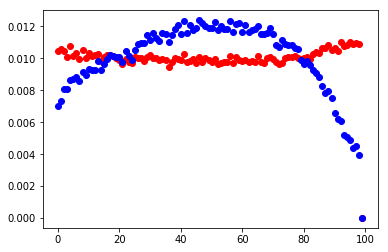

In [24]:
plt.figure(1)
plt.plot(lambda00,'ro',color='red')
plt.plot(lambda10,'ro',color='blue')
plt.show()

# We display the the distribution $Pr(p2|y_i)$
## Red when $y_i=0$
## Blue when $y_i=1$

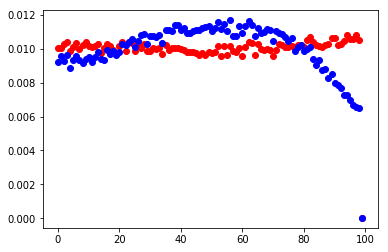

In [25]:
plt.figure(1)
plt.plot(lambda01,'ro',color='red')
plt.plot(lambda11,'ro',color='blue')
plt.show()

# We display the the distribution $Pr(c1|y_i)$
## Red when $y_i=0$
## Blue when $y_i=1$

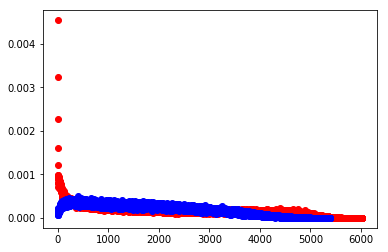

In [26]:
plt.figure(1)
plt.plot(lambda02,'ro',color='red')
plt.plot(lambda12,'ro',color='blue')
plt.show()

# We display the the distribution $Pr(c2|y_i)$
## Red when $y_i=0$
## Blue when $y_i=1$

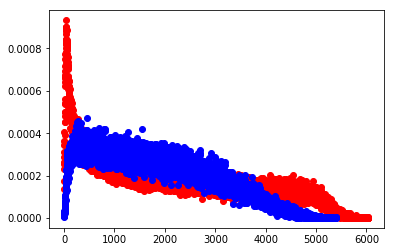

In [27]:
plt.figure(1)
plt.plot(lambda03,'ro',color='red')
plt.plot(lambda13,'ro',color='blue')
plt.show()

# Mean tendencies of p1, p2, c1 and c2 according to the position

In blue the number of times a given position has been inside the reoptimzation window
In red the number of times a given position has not been inside the reoptimzation window


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice.
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice.
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.


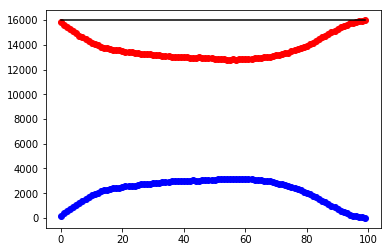

In blue the average values of p1 for a given position that is inside the reoptimzation window
In red the average values of p1 for a given position that is not inside the reoptimzation window


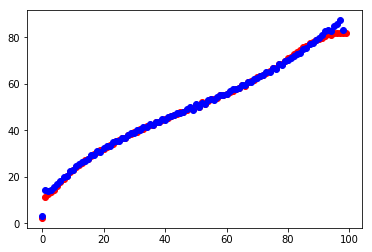

In blue the average values of p2 for a given position that is inside the reoptimzation window
In red the average values of p2 for a given position that is not inside the reoptimzation window


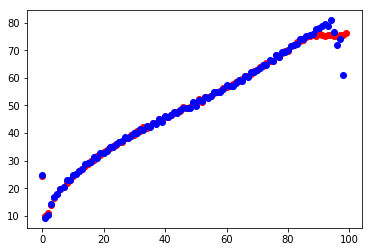

In blue the average values of c1 for a given position that is inside the reoptimzation window
In red the average values of c1 for a given position that is not inside the reoptimzation window


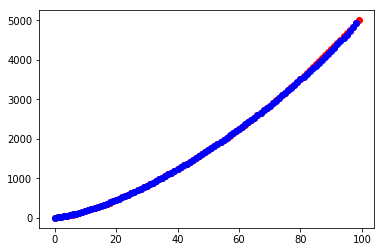

In blue the average values of c2 for a given position that is inside the reoptimzation window
In red the average values of 2 for a given position that is not inside the reoptimzation window


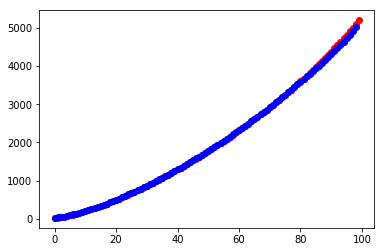

In [28]:
listp11=[]
listp10=[]
listp21=[]
listp20=[]
list1=[]
list0=[]

listc11=[]
listc10=[]
listc21=[]
listc20=[]

for i in range(0,100):
    indices=np.where(Y_train[:,i,0]==1)
    indiceszero=np.where(Y_train[:,i,0]==0)
    #print("position="+str(i))
    #plt.figure(i)
    val=X_train[indices,i,0]
    valzero=X_train[indiceszero,i,0] 
    listp11.append(val.mean())
    listp10.append(valzero.mean())
    
    list1.append(len(indices[0]))
    list0.append(len(indiceszero[0]))
    
    val=X_train[indices,i,1]
    valzero=X_train[indiceszero,i,1] 
    listp21.append(val.mean())
    listp20.append(valzero.mean())
    
    val=X_train[indices,i,2]
    valzero=X_train[indiceszero,i,2] 
    listc11.append(val.mean())
    listc10.append(valzero.mean())
    
    val=X_train[indices,i,3]
    valzero=X_train[indiceszero,i,3] 
    listc21.append(val.mean())
    listc20.append(valzero.mean())
    
    #plt.plot(val,gaussian(val, val.mean(), val.var()),'ro')
    #plt.show()
print("In blue the number of times a given position has been inside the reoptimzation window")
print("In red the number of times a given position has not been inside the reoptimzation window")
plt.figure(1)
plt.plot(list0,'ro',color="red")
plt.plot(list1,'ro',color="blue")
plt.plot(np.array(list0)+np.array(list1),color="black")
plt.show()

print("In blue the average values of p1 for a given position that is inside the reoptimzation window")
print("In red the average values of p1 for a given position that is not inside the reoptimzation window")
plt.figure(2)
plt.plot(listp10,'ro',color="red")
plt.plot(listp11,'ro',color="blue")
plt.show()

print("In blue the average values of p2 for a given position that is inside the reoptimzation window")
print("In red the average values of p2 for a given position that is not inside the reoptimzation window")
plt.figure(3)
plt.plot(listp20,'ro',color="red")
plt.plot(listp21,'ro',color="blue")
plt.show()

print("In blue the average values of c1 for a given position that is inside the reoptimzation window")
print("In red the average values of c1 for a given position that is not inside the reoptimzation window")
plt.figure(4)
plt.plot(listc10,'ro',color="red")
plt.plot(listc11,'ro',color="blue")
plt.show()
print("In blue the average values of c2 for a given position that is inside the reoptimzation window")
print("In red the average values of 2 for a given position that is not inside the reoptimzation window")
plt.figure(5)
plt.plot(listc20,'ro',color="red")
plt.plot(listc21,'ro',color="blue")
plt.show()



# $Pr(y_i|y_{i-1})$

In [29]:
pyiyiminusone=np.zeros((2,2))
nbyiminusonezero=0
nbyiminusoneone=0
for i in range(100):
    seqy=Y_train[i,:,0]
    for j in range(100-1):
        yiminusone=seqy[j]
        yi=seqy[j+1]
        pyiyiminusone[yiminusone,yi]+=1
        nbyiminusoneone+=yiminusone
        nbyiminusonezero+=(1-yiminusone)       

pyiyiminusone[0]/=float(nbyiminusonezero)
pyiyiminusone[1]/=float(nbyiminusoneone)
print(pyiyiminusone)    
print(pyiyiminusone.shape)    
print(pyiyiminusone[0].sum())    
print(pyiyiminusone[1].sum())    


[[0.98833235 0.01166765]
 [0.07067138 0.92932862]]
(2, 2)
1.0
1.0


# $Pr(y_i|y_{i-1},i-1)$

In [30]:
pyiyiminusone=np.zeros((100,2,2))
for j in range(100-1):
    nbyiminusonezero=0
    nbyiminusoneone=0    
    for i in range(100):
        seqy=Y_train[i,:,0]
        yiminusone=seqy[j]
        yi=seqy[j+1]
        pyiyiminusone[j,yiminusone,yi]+=1
        
        nbyiminusoneone+=yiminusone
        nbyiminusonezero+=(1-yiminusone)       
    pyiyiminusone[j,0]/=float(nbyiminusonezero)
    pyiyiminusone[j,1]/=float(nbyiminusoneone)
    
#print(pyiyiminusone)    
print(pyiyiminusone.shape)    
print(pyiyiminusone[0,0].sum())    
print(pyiyiminusone[0,1].sum())
print(pyiyiminusone[0])

print(pyiyiminusone[50,0].sum())    
print(pyiyiminusone[50,1].sum())
print(pyiyiminusone[50])

(100, 2, 2)
1.0
1.0
[[0.95959596 0.04040404]
 [0.         1.        ]]
1.0
1.0
[[0.9875 0.0125]
 [0.05   0.95  ]]


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


# Let's decode a sequence : Viterbi algorithm
Let us recall : 
$$U_i(y_i) =-\log [ Pr(x_i^{new}|y_i) ]$$
$$P_i(y_i,y_{i-1}) =-\log [ Pr(y_i|y_{i-1}) ]$$

The algorithm' concept :
$S_{1,k}=U_1(y_1=k,x^{new}_1)$

$S_{2,k}=U_2(y_2=k,x^{new}_2)+ \min_l [S_{1,l}+P_2(y_1=l,y_2=k)] $

$S_{i,k}=U_i(y_i=k,x^{new}_i)+ \min_l [S_{i-1,l}+P_i(y_{i-1}=l,y_i=k)] $

$\hat{y}_{100}=argmin_k [S_{100,k}] $

# First let us compute the probability $Pr(x_i|y_i)$ and $Pr(y_i|y_{i-1})$

[[0.98833235 0.01166765]
 [0.07067138 0.92932862]]
(4, 2, 7000)
In blue the distribution of p1 for positions that are inside the reoptimzation window
In red the distribution of p1 for positions that are not inside the reoptimzation window


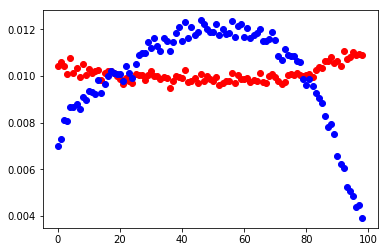

In blue the distribution of p2 for positions that are inside the reoptimzation window
In red the distribution of p2 for positions that are not inside the reoptimzation window


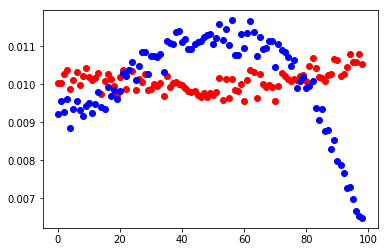

In blue the distribution of c1 for positions that are inside the reoptimzation window
In red the distribution of c1 for positions that are not inside the reoptimzation window


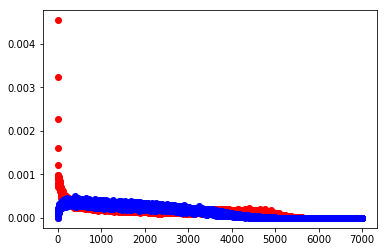

In blue the distribution of c2 for positions that are inside the reoptimzation window
In red the distribution of c2 for positions that are not inside the reoptimzation window


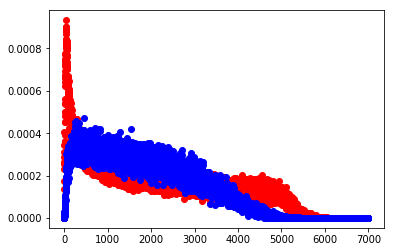

In [31]:
def computepy():
    py=np.zeros((2,2))
    nbyiminusonezero=0
    nbyiminusoneone=0
    for i in range(100):
        seqy=Y_train[i,:,0]
        for j in range(100-1):
            yiminusone=seqy[j]
            yi=seqy[j+1]
            py[yiminusone,yi]+=1
            nbyiminusoneone+=yiminusone
            nbyiminusonezero+=(1-yiminusone)       
    py[0]/=float(nbyiminusonezero)
    py[1]/=float(nbyiminusoneone)
    return py

def computepx():
    px=np.zeros((4,2,7000))
    
    indiceszeros=np.where(Y_train[:,:,0]==0)
    indicesones=np.where(Y_train[:,:,0]==1)
    
    p1= X_train[indiceszeros[0],indiceszeros[1],0]
    uniquevalues, counts=np.unique(p1, return_counts=True)
    px[0,0,uniquevalues]=counts
    px[0,0,:]/=counts.sum()
    p1= X_train[indicesones[0],indicesones[1],0]
    uniquevalues, counts=np.unique(p1, return_counts=True)
    px[0,1,uniquevalues]=counts
    px[0,1,:]/=counts.sum()
    
    
    p2= X_train[indiceszeros[0],indiceszeros[1],1]
    uniquevalues, counts=np.unique(p2, return_counts=True)
    px[1,0,uniquevalues]=counts
    px[1,0,:]/=counts.sum()
    p2= X_train[indicesones[0],indicesones[1],1]
    uniquevalues, counts=np.unique(p2, return_counts=True)
    px[1,1,uniquevalues]=counts
    px[1,1,:]/=counts.sum()
    
    c1= X_train[indiceszeros[0],indiceszeros[1],2]
    uniquevalues, counts=np.unique(c1, return_counts=True)
    px[2,0,uniquevalues]=counts
    px[2,0,:]/=counts.sum()
    c1= X_train[indicesones[0],indicesones[1],2]
    uniquevalues, counts=np.unique(c1, return_counts=True)
    px[2,1,uniquevalues]=counts
    px[2,1,:]/=counts.sum()
    
    c2= X_train[indiceszeros[0],indiceszeros[1],3]
    uniquevalues, counts=np.unique(c2, return_counts=True)
    px[3,0,uniquevalues]=counts    
    px[3,0,:]/=counts.sum()
    c2= X_train[indicesones[0],indicesones[1],3]
    uniquevalues, counts=np.unique(c2, return_counts=True)
    px[3,1,uniquevalues]=counts
    px[3,1,:]/=counts.sum()
    
    return px

py=computepy()
print(py)
px=computepx()
print(px.shape)
print("In blue the distribution of p1 for positions that are inside the reoptimzation window")
print("In red the distribution of p1 for positions that are not inside the reoptimzation window")
plt.figure()
plt.plot(px[0,0,1:100],'ro',color="red")
plt.plot(px[0,1,1:100],'ro',color="blue")
plt.show()

print("In blue the distribution of p2 for positions that are inside the reoptimzation window")
print("In red the distribution of p2 for positions that are not inside the reoptimzation window")
plt.figure()
plt.plot(px[1,0,1:100],'ro',color="red")
plt.plot(px[1,1,1:100],'ro',color="blue")
plt.show()

print("In blue the distribution of c1 for positions that are inside the reoptimzation window")
print("In red the distribution of c1 for positions that are not inside the reoptimzation window")
plt.figure()
plt.plot(px[2,0,],'ro',color="red")
plt.plot(px[2,1,],'ro',color="blue")
plt.show()

print("In blue the distribution of c2 for positions that are inside the reoptimzation window")
print("In red the distribution of c2 for positions that are not inside the reoptimzation window")
plt.figure()
plt.plot(px[3,0,],'ro',color="red")
plt.plot(px[3,1,],'ro',color="blue")
plt.show()

# Let us code the Viterbi Algorithm

In [33]:

def Ui(yi,x):
    p1=0
    p2=1
    c1=2
    c2=3

    pr1=px[p1,yi,x[0]]
    pr2=px[p2,yi,x[1]]
    pr3=px[c1,yi,x[2]]
    pr4=px[c2,yi,x[3]]
    
    pr1=-np.log(pr1)
    pr2=-np.log(pr2)
    pr3=-np.log(pr3)
    pr4=-np.log(pr4)
    
    pr=pr1+pr2+pr3+pr4
    return pr

def Pi(yi,yiminusone):
    return -np.log(py[yiminusone,yi])

def FindMin(S,yi,i):
    minindex=-1
    minval=999999
    for l in range(0,2):
        vals=S[i-1,l]
        valp=Pi(yi,l)
        val=vals+valp
        if val < minval:
            minval=val
            minindex=l
    return minval,minindex


xnew=X_train[0,:,:]
S=np.zeros((100,2))
Sindice=np.zeros((100,2))
i=0
yi=0
x=xnew[i]
S[i,yi]=Ui(yi,x)
yi=1
S[i,yi]=Ui(yi,x)

for i in range(1,100):
    x=xnew[i]
    for yi in range(0,2):
        minvall,minl=FindMin(S,yi,i)
        Sindice[i,yi]=minl
        S[i,yi]=Ui(yi,x)+minvall

ypred=[]
ycur=S[99,:].argmin()
print(ycur)
ypred.append(ycur)
i=99
while i >= 1:
    #print(int(Sindice[i,int(ycur)])
    ycur=Sindice[i,int(ycur)]
    ypred.append(int(ycur))
    i=i-1
ypred.reverse()
print(ypred)
print(np.abs(ypred-Y_train[0,:,0]).sum())
#print((np.abs(ypred-Y_train[0,:,:]).sum())

0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
69


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


# Let's try to test on many $x_i$ 

In [35]:
errors=[]
for j in range(X_train.shape[0]):
    xnew=X_train[j,:,:]
    S=np.zeros((100,2))
    Sindice=np.zeros((100,2))
    i=0
    yi=0
    x=xnew[i]
    S[i,yi]=Ui(yi,x)
    yi=1
    S[i,yi]=Ui(yi,x)

    for i in range(1,100):
        x=xnew[i]
        for yi in range(0,2):
            minvall,minl=FindMin(S,yi,i)
            Sindice[i,yi]=minl
            S[i,yi]=Ui(yi,x)+minvall

    ypred=[]
    ycur=S[99,:].argmin()
    ypred.append(ycur)
    i=99
    while i >= 1:
        ycur=Sindice[i,int(ycur)]
        ypred.append(int(ycur))
        i=i-1
    ypred.reverse()
    #print(ypred)
    error = np.abs(ypred-Y_train[0,:,0]).sum()
    print(error)
    errors.append(error)
    


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


69
69
69
65
65
65
57
57
57
63
63
63
61
61
61
61
61
61
69
67
61
61
62
62
62
62
62
62
62
62
56
56
54
54
54
54
53
52
56
56
56
56
62
66
66
66
66
61
58
58
58
58
57
57
62
62
59
59
60
60
57
57
57
57
57
57
59
59
59
56
56
54
61
61
61
61
61
61
57
57
57
57
57
57
55
55
55
54
54
54
67
65
60
60
61
61
63
63
63
63
61
61
54
54
53
54
54
54
56
56
56
55
55
55
58
58
58
58
58
58
56
55
55
55
55
55
63
63
63
62
62
62
63
59
59
59
60
60
53
50
50
50
53
55
63
62
62
62
62
62
64
64
62
62
62
60
56
58
58
58
57
57
63
63
63
63
64
59
60
60
60
60
62
62
62
56
56
56
58
57
58
57
57
57
57
57
59
59
55
57
57
57
57
57
60
60
58
58
54
54
55
55
56
56
66
66
66
63
63
63
59
59
59
54
54
59
62
62
63
63
63
60
58
56
56
56
56
56
65
65
65
65
66
66
54
54
54
54
54
54
59
59
58
58
57
57
52
52
50
50
50
50
57
57
57
56
56
54
51
51
52
52
52
52
56
61
61
61
55
55
58
55
55
55
55
55
52
52
52
52
52
52
56
56
56
56
56
56
60
59
59
61
61
61
61
61
58
58
58
58
55
55
55
55
55
55
63
62
62
62
62
62
60
60
60
60
60
60
68
59
59
61
61
61
61
54
55
55
55
55
55
52
52
5

49
49
55
55
55
55
55
55
55
59
59
61
61
61
52
51
51
51
52
52
57
57
57
57
57
57
65
65
65
66
67
67
61
62
62
62
62
61
57
57
55
52
52
52
62
62
62
62
63
64
60
60
60
58
60
60
62
62
62
64
64
64
60
60
60
60
58
57
63
62
62
62
62
62
56
59
59
59
59
59
53
53
53
53
53
53
58
58
59
59
59
55
68
68
68
68
68
68
58
58
58
56
56
56
55
55
55
55
53
53
62
62
62
62
62
62
57
57
57
57
57
57
59
59
54
54
54
54
56
57
57
56
56
56
54
53
50
50
55
55
50
50
50
50
50
50
61
61
59
59
59
57
52
52
52
52
52
55
64
58
58
59
60
60
61
59
59
59
59
59
60
57
57
57
57
57
61
58
58
65
65
64
55
57
57
57
57
57
54
54
54
54
54
54
55
55
58
58
58
58
64
64
64
64
64
64
54
54
54
54
51
49
55
55
55
55
55
55
62
62
62
60
60
60
55
55
56
56
56
56
65
65
65
65
65
64
57
57
60
61
61
61
53
54
54
54
54
52
51
51
51
51
52
52
64
64
64
64
64
61
52
52
52
52
51
51
58
58
65
65
65
65
61
61
60
60
60
60
58
57
57
57
54
54
60
60
60
61
61
61
59
59
59
59
59
56
61
67
67
64
64
64
58
59
59
59
59
58
61
60
61
61
60
60
62
62
62
56
56
58
64
61
61
61
60
60
56
56
56
58
58
58
59
6

62
61
60
59
59
59
56
56
61
62
62
62
62
62
60
60
61
61
61
61
59
60
58
58
58
57
61
61
61
61
61
61
58
57
57
58
58
58
58
58
58
58
58
61
60
59
59
59
57
55
61
61
61
61
61
61
65
67
67
67
67
61
53
53
53
53
54
54
68
68
68
68
61
61
53
53
56
56
56
56
54
54
54
54
54
56
51
51
51
52
55
55
55
55
54
54
57
57
64
65
65
65
65
65
57
57
57
57
57
57
54
53
53
53
53
55
59
59
60
60
60
60
63
63
63
63
64
64
60
60
60
60
60
54
63
63
63
63
61
61
57
57
60
60
60
59
61
61
61
61
61
61
54
56
54
54
53
57
61
61
57
57
57
57
61
61
61
61
60
60
60
61
61
62
66
66
53
54
54
54
54
54
58
58
58
58
58
54
61
62
62
62
62
62
59
59
58
58
60
60
60
60
60
64
64
64
66
63
63
63
62
62
52
52
52
52
52
54
58
58
55
55
55
54
59
59
59
59
59
59
56
56
56
56
56
56
59
59
57
57
57
55
53
51
51
51
51
51
56
56
56
56
56
56
58
57
57
57
57
57
60
60
60
60
59
59
59
59
59
59
59
61
56
56
56
56
56
57
62
62
62
62
62
63
55
55
56
56
56
56
63
63
63
63
63
63
54
54
55
55
55
55
57
57
59
59
59
57
55
55
55
57
56
56
51
51
50
50
50
50
55
55
55
55
55
55
63
63
64
71
71
64
65
6

65
62
54
54
54
54
57
57
60
62
62
62
62
62
61
61
61
61
62
62
62
63
63
63
60
60
54
54
54
54
63
63
60
62
62
62
62
62
62
61
61
61
61
61
57
57
57
57
57
57
57
59
56
56
56
56
55
54
54
54
54
54
61
61
61
61
63
63
62
53
53
56
57
57
53
56
56
56
58
58
58
60
59
59
59
59
59
53
53
54
54
54
53
55
55
55
53
53
56
55
55
55
55
53
53
59
59
59
59
57
59
52
52
52
52
52
54
62
62
65
69
69
69
55
53
53
54
54
54
65
65
65
65
65
65
57
57
57
57
57
57
65
65
65
65
65
65
58
58
58
58
58
58
63
63
62
62
62
64
53
53
53
53
53
53
59
61
61
60
60
60
54
53
53
53
53
53
56
56
55
55
55
57
58
58
58
58
58
58
52
52
52
52
52
52
61
61
61
61
61
61
58
58
58
57
57
61
56
56
56
54
54
54
51
51
52
52
52
52
60
60
60
60
60
60
60
64
64
64
64
63
64
64
64
61
61
61
52
52
52
52
52
52
61
61
60
60
60
60
61
61
61
61
61
60
54
54
55
55
55
55
57
56
56
53
53
53
65
59
59
59
58
58
56
56
55
55
55
55
56
56
56
55
55
59
59
59
59
60
60
60
66
69
69
66
62
62
61
61
63
60
60
60
61
61
61
61
63
63
69
69
63
63
63
63
65
65
66
66
61
61
63
63
63
64
64
63
61
61
61
61
56
55
5

54
52
61
62
62
62
65
65
59
59
61
61
61
61
59
61
61
61
59
59
60
60
60
60
60
62
51
51
53
53
53
54
68
68
68
62
62
66
64
64
68
68
68
68
55
56
56
56
56
52
56
56
56
56
56
58
62
62
62
63
63
63
63
63
63
63
63
63
56
56
57
56
56
55
59
59
56
56
56
56
62
62
62
62
62
60
60
60
60
60
60
60
64
64
64
64
64
65
57
57
57
58
58
57
53
53
53
53
53
53
64
64
64
64
65
65
58
58
58
56
56
56
63
63
65
65
64
64
62
62
62
62
62
62
50
50
54
54
54
58
58
59
59
59
59
60
59
59
59
61
61
54
54
54
54
53
53
59
59
59
59
59
59
62
62
62
62
62
62
60
59
59
59
59
60
59
59
59
59
59
59
61
61
61
61
61
61
55
55
55
56
56
56
64
64
64
64
64
64
56
56
56
56
56
56
59
61
63
63
63
62
60
60
60
60
60
59
58
58
58
58
58
58
57
58
58
58
60
60
61
61
61
62
62
62
55
55
53
53
53
53
62
62
62
60
58
58
62
62
62
62
62
62
57
57
57
57
54
54
62
62
62
60
60
60
57
57
59
59
59
60
58
59
61
61
61
62
59
61
62
62
62
62
57
57
57
57
57
57
58
58
58
60
60
60
67
66
66
65
65
65
61
61
61
64
64
67
61
61
61
61
57
57
57
57
56
56
56
56
55
55
55
54
55
55
60
60
60
59
59
59
54
54
5

# Let's display the errors

47
58.554262838556326
72


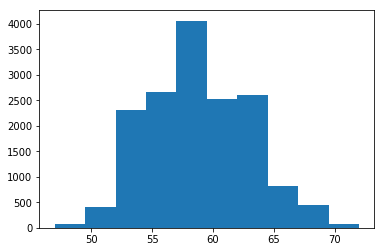

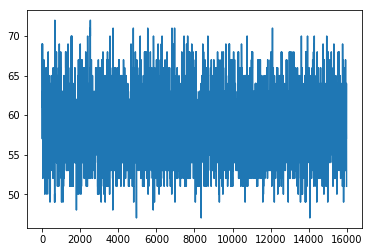

In [36]:
errors=np.array(errors)
print(errors.min())
print(errors.mean())
print(errors.max())
plt.figure(1)
plt.hist(errors)
plt.show()

plt.figure(1)
plt.plot(errors)
plt.show()


# Conclusions
Errors are quite big more that 50%